<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Minimos_Cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere el problema de valor inicial $u ^{´´}+u=x$ con las condiciones $u(0)=0$ y $u^´(0)=2$ Encuentre una solución aproximada de la forma

$$u_{N}=α_0 + α_1x + α_2x_2 + α_3x_3 +⋯$$

(i) Elija $α_0$ y $α_1$ para satisfacer las condiciones dadas.

ii) Defina $ϵ=u^{′′}_{N} + u_N - x$ y encuentre $ϵ$ en este caso.

Restringiendo $u_N$ a un polinomio cúbico, use $x=\frac{1}{2}$ y $x=1$ como puntos de colocación para encontrar una solución aproximada.


In [1]:
#Importación de librerías
import sympy as sp #cálculo simbólico gráfico.
import numpy as np # numérico
import matplotlib.pyplot as plt #gráfico.

#Definición de variables y función

In [2]:
x, a2, a3 = sp.symbols('x a2 a3')  # Variables: x (independiente), a2, a3 (coeficientes por determinar)
u = sp.Function('u')  # Función u(x)

#Solución exacta de la EDO $u^{''} + u = x$ con condiciones $u(0)=0$, $u^´(0)=2$

In [3]:
ode = u(x).diff(x, 2) + u(x) - x
sol_exact = sp.dsolve(ode, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})
print("Solución exacta:")
sp.pprint(sol_exact.rhs)

Solución exacta:
x + sin(x)


# Parte 4: Aproximación polinómica cúbica con condiciones iniciales
# (i) Condiciones iniciales: $u(0)=0$ -> $a0=0$, $u^´(0)=2$ -> $a1=2$
# $u_N = 2*x + a2*x^2 + a3*x^3$

In [4]:

u_N = 2*x + a2*x**2 + a3*x**3
print("\nAproximación polinómica:")
sp.pprint(u_N)


Aproximación polinómica:
    2       3      
a₂⋅x  + a₃⋅x  + 2⋅x


In [5]:
#Cálculo del residuo E = u_N'' + u_N - x
E = sp.Function('E')  # Definimos E como función simbólica
u_N_2 = sp.diff(u_N, x, 2)  # Segunda derivada
E = u_N_2 + u_N - x  # Residuo E = u'' + u - x
print("\nResiduo E = u_N'' + u_N - x:")
sp.pprint(E)


Residuo E = u_N'' + u_N - x:
    2       3                      
a₂⋅x  + a₃⋅x  + x + 2⋅(a₂ + 3⋅a₃⋅x)


 Integral de cuadrados del residuo en $[0,1]$:

In [6]:
#Integral de E^2 en [0,1] - MÍNIMOS CUADRADOS
I = sp.integrate(E**2, (x, 0, 1))
print("\nIntegral I = ∫₀¹ E² dx:")
sp.pprint(I)


Integral I = ∫₀¹ E² dx:
     2                           2            
83⋅a₂    49⋅a₂⋅a₃   5⋅a₂   509⋅a₃    22⋅a₃   1
────── + ──────── + ──── + ─────── + ───── + ─
  15        3        2       35        5     3


 Derivadas parciales de $I$ respecto a $\alpha_2$ y $\alpha_3$  para minimizar el error.

In [7]:

#Derivadas parciales de I respecto a a2 y a3
dIa2 = sp.diff(I, a2)
dIa3 = sp.diff(I, a3)
print("\nDerivada parcial ∂I/∂a2:")
sp.pprint(dIa2)
print("\nDerivada parcial ∂I/∂a3:")
sp.pprint(dIa3)


Derivada parcial ∂I/∂a2:
166⋅a₂   49⋅a₃   5
────── + ───── + ─
  15       3     2

Derivada parcial ∂I/∂a3:
49⋅a₂   1018⋅a₃   22
───── + ─────── + ──
  3       35      5 


Resolución del sistema de ecuaciones $\frac{\partial I}{\partial \alpha_2} = 0$ y $\frac{\partial I}{\partial \alpha_3} = 0$ para encontrar los coeficientes óptimos.

In [8]:
#Resolver sistema de ecuaciones ∂I/∂a2 = 0, ∂I/∂a3 = 0
sol_coeficientes = sp.solve([sp.Eq(dIa2, 0), sp.Eq(dIa3, 0)], [a2, a3], simplify=True)
print("\nCoeficientes encontrados por mínimos cuadrados:")
print(sol_coeficientes)


Coeficientes encontrados por mínimos cuadrados:
{a2: -1335/86789, a3: -24759/173578}


 Sustitución de coeficientes en la aproximación para obtener la solución por mínimos cuadrados.

In [9]:
#Sustituir coeficientes en la aproximación
u_aproximada = u_N.subs(sol_coeficientes)
print("\nAproximación por mínimos cuadrados u_N(x):")
sp.pprint(u_aproximada)


Aproximación por mínimos cuadrados u_N(x):
         3         2      
  24759⋅x    1335⋅x       
- ──────── - ─────── + 2⋅x
   173578     86789       


In [10]:
#Conversión a funciones numéricas
u_exacta_fn = sp.lambdify(x, sol_exact.rhs, "numpy")
u_aproximada_fn = sp.lambdify(x, u_aproximada, "numpy")

In [11]:
#Cálculo del error numérico
xx = np.linspace(0, 1, 100)
error_absoluto = np.abs(u_exacta_fn(xx) - u_aproximada_fn(xx))
error_maximo = np.max(error_absoluto)
error_cuadratico = np.sqrt(np.mean(error_absoluto**2))
print(f"\nError máximo en [0,1]: {error_maximo:.6f}")
print(f"Error cuadrático medio en [0,1]: {error_cuadratico:.6f}")


Error máximo en [0,1]: 0.001101
Error cuadrático medio en [0,1]: 0.000681


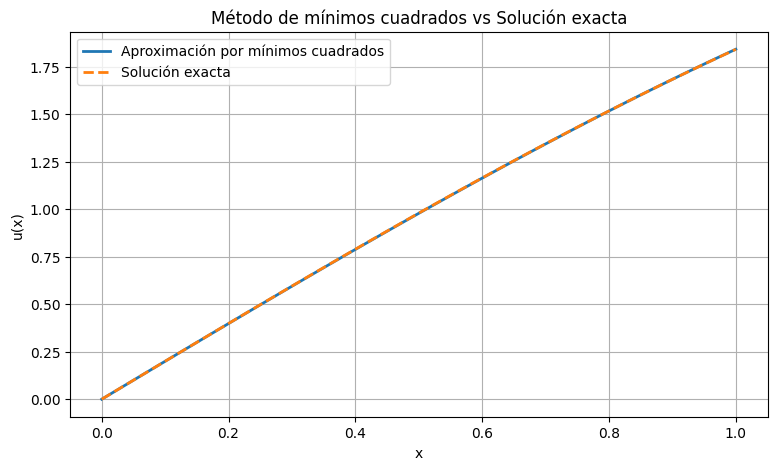

In [12]:
#Gráfica comparativa
plt.figure(figsize=(9, 5))
plt.plot(xx, u_aproximada_fn(xx), label='Aproximación por mínimos cuadrados', linewidth=2)
plt.plot(xx, u_exacta_fn(xx), "--", label="Solución exacta", linewidth=2)

plt.title("Método de mínimos cuadrados vs Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

#Gráfica comparativa de ambos métodos

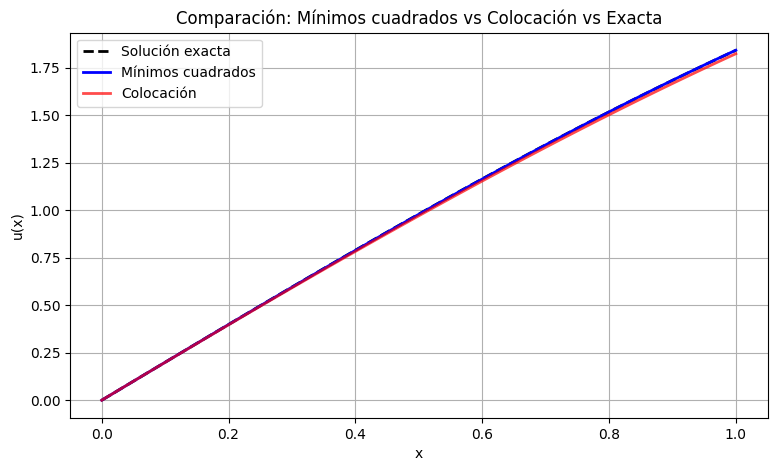

In [16]:
# Redefinir variables y u_N para asegurar su disponibilidad
x, a2, a3 = sp.symbols('x a2 a3')
u_N = 2*x + a2*x**2 + a3*x**3

# Calcular el residuo E (recalc from previous steps for self-contained cell)
u_N_2 = sp.diff(u_N, x, 2)
E = u_N_2 + u_N - x
E_expanded = sp.expand(E)

# Puntos de colocación
# (ii) Colocación: E(1/2) = 0, E(1) = 0
eq1 = sp.Eq(E_expanded.subs(x, sp.Rational(1, 2)), 0)
eq2 = sp.Eq(E_expanded.subs(x, 1), 0)

sol_colocacion = sp.solve([eq1, eq2], [a2, a3])

u_colocacion = u_N.subs(sol_colocacion)

# Convertir a función numérica
u_colocacion_fn = sp.lambdify(x, u_colocacion, "numpy")

plt.figure(figsize=(9, 5))
plt.plot(xx, u_exacta_fn(xx), 'k--', label="Solución exacta", linewidth=2)
plt.plot(xx, u_aproximada_fn(xx), 'b-', label="Mínimos cuadrados", linewidth=2)
plt.plot(xx, u_colocacion_fn(xx), 'r-', label="Colocación", linewidth=2, alpha=0.7)

plt.title("Comparación: Mínimos cuadrados vs Colocación vs Exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()